# Telecom Churn Case Study

## Problem Statement

>In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

## Understanding Churn
>Although there can be different definitions of churn, for this project we will define churn as:-<br>
**Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

## Business Objective
>The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

## Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

- The **‘good’ phase**: In this phase, the customer is happy with the service and behaves as usual.<br>


- The **‘action’ phase**: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)<br>


- The **‘churn’ phase**: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.<br>

In [1]:
#Importing necessary libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

warnings.filterwarnings("ignore")

#Directory
path = "/Users/sony-pc/Telecom_churn_case study/"

In [2]:
#Setting display options
pd.set_option("display.max_columns", 50)
pd.set_option("display.min_rows", 50)
pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
#Reading the telecom_churn csv file
tele_data = pd.read_csv(path+"telecom_churn_data.csv")

#Storing the data in a dataframe
churn_df = pd.DataFrame(tele_data)

#Glimpse of the dataset
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,...,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,...,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,...,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,309.88,238.17,163.43,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


In [4]:
churn_df.select_dtypes(include = "object")

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN
5,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/19/2014,7/17/2014,8/24/2014,9/28/2014,NaN,NaN,NaN,NaN
6,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/28/2014,9/28/2014,NaN,NaN,NaN,NaN
7,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/27/2014,7/25/2014,8/26/2014,9/30/2014,NaN,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/25/2014,7/31/2014,8/30/2014,9/30/2014,NaN,7/31/2014,8/23/2014,NaN
9,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/23/2014,8/29/2014,9/20/2014,NaN,7/23/2014,NaN,NaN


In [4]:
#Brief information about the dataframe
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Filtering high value customers
>We want to make predictions only on high value customers as 80% of the revenue comes only from 20% of the customers.<br>
High-value customers are defined as: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [5]:
#New column for Average recharge amount for months of July ang August
churn_df["avg_rech_amt_6&7"] = np.sum(churn_df[["total_rech_amt_6", "total_rech_amt_7"]], axis = 1)/2

In [6]:
#70th percentile of average recharge amount for months July ang August
perc_70 = np.percentile(churn_df["avg_rech_amt_6&7"], 70)
print("The 70% percentile of average recharges amount for months July and August is ",perc_70)

The 70% percentile of average recharges amount for months July and August is  368.5


In [7]:
#Filtering high value customers based on rech_amt for months of July and August
churn_df = churn_df[churn_df["avg_rech_amt_6&7"]>=perc_70]
churn_df.reset_index(drop = True, inplace = True)

print("The number of data points has reduced to", churn_df.shape[0])

The number of data points has reduced to 30011


### Data Cleaning and preprocessing

#### 1. Dropping columns with only 1 unique value

In [8]:
#Dropping columns with 1 unique values as they do not provide any useful information for the analysis
columns = churn_df.columns
cols_to_drop = []
for i in columns:
    if len(churn_df[i].unique()) <=2: #Nan is also included
        cols_to_drop.append(i)
        
churn_df.drop(columns = cols_to_drop, inplace =True)

In [9]:
print("The number of features in the dataset have reduced to {}.".format(churn_df.shape[1]))

The number of features in the dataset have reduced to 211.


In [10]:
#Missing values in the filtered dataframe with high value customers
churn_df.isna().sum()/churn_df.shape[0]*100

mobile_number                      0.00
arpu_6                             0.00
arpu_7                             0.00
arpu_8                             0.00
arpu_9                             0.00
onnet_mou_6                        1.05
onnet_mou_7                        1.01
onnet_mou_8                        3.13
onnet_mou_9                        5.68
offnet_mou_6                       1.05
offnet_mou_7                       1.01
offnet_mou_8                       3.13
offnet_mou_9                       5.68
roam_ic_mou_6                      1.05
roam_ic_mou_7                      1.01
roam_ic_mou_8                      3.13
roam_ic_mou_9                      5.68
roam_og_mou_6                      1.05
roam_og_mou_7                      1.01
roam_og_mou_8                      3.13
roam_og_mou_9                      5.68
loc_og_t2t_mou_6                   1.05
loc_og_t2t_mou_7                   1.01
loc_og_t2t_mou_8                   3.13
loc_og_t2t_mou_9                   5.68


In [11]:
#Describe the dataset
churn_df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,...,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6&7
count,"30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","29,695.00","29,708.00","29,073.00","28,307.00","29,695.00","29,708.00","29,073.00","28,307.00","29,695.00","29,708.00","29,073.00","28,307.00","29,695.00","29,708.00","29,073.00","28,307.00","29,695.00","29,708.00","29,073.00","28,307.00",...,"30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","11,397.00","11,662.00","11,754.00","11,461.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00"
mean,"7,001,222,923.60",587.28,589.14,534.86,488.66,299.18,307.45,276.23,255.23,422.38,428.25,387.12,357.38,17.60,13.66,13.68,12.08,29.63,22.26,22.16,18.27,95.69,96.71,89.95,85.62,...,0.13,0.11,0.10,0.50,0.59,0.61,0.52,0.17,0.19,0.17,0.18,0.14,0.15,0.14,0.14,0.90,0.89,0.84,0.83,"1,264.06",129.44,135.13,121.36,6.56,696.66
std,"684,640.49",442.72,462.90,492.26,496.49,462.20,483.24,471.51,451.89,471.10,487.10,480.28,449.77,79.55,76.68,75.71,70.32,119.16,98.40,107.87,92.77,237.90,249.21,237.95,233.80,...,0.39,0.36,0.34,1.70,1.90,1.84,1.54,0.57,0.62,0.58,0.57,0.88,0.97,0.97,0.94,0.30,0.31,0.37,0.37,975.26,390.48,408.02,389.73,48.64,488.78
min,"7,000,000,074.00","-2,258.71","-2,014.05",-945.81,"-1,899.51",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00,368.50
25%,"7,000,641,091.50",364.16,365.00,289.61,239.18,42.96,42.66,32.21,26.14,141.41,139.59,107.66,88.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.81,9.59,7.23,5.89,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,480.00,0.00,0.00,0.00,0.00,450.00
50%,"7,001,231,966.00",495.68,493.56,452.09,413.15,128.33,127.95,106.28,94.08,285.96,285.49,251.36,226.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.33,33.87,30.83,28.44,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,914.00,0.00,0.00,0.00,0.00,568.50
75%,"7,001,813,975.00",703.92,700.79,671.15,635.55,357.12,364.57,309.98,280.86,527.32,536.83,493.51,454.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,92.69,92.49,87.54,83.38,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,"1,924.00",1.60,1.99,0.00,0.00,795.50
max,"7,002,410,905.00","27,731.09","35,145.83","33,543.62","38,805.62","7,376.71","8,157.78","10,752.56","10,427.46","8,362.36","9,667.13","14,007.34","10,310.76","2,613.31","3,813.29","4,169.81","3,220.66","3,775.11","2,812.04","5,337.04","4,428.46","6,431.33","7,400.66","10,752.56","10,389.24",...,5.00,5.00,4.00,39.00,48.00,44.00,40.00,14.00,16.00,16.00,11.00,29.00,35.00,41.00,49.00,1.00,1.00,1.00,1.00,"4,321.00","12,916.22","9,165.60","11,166.21","2,618.57","37,762.50"


#### 2. Imputing columns with min value as 1 with 0 at missing entries

In [12]:
#Imputing cols with min value as 1 with 0 at missing entries

for i in list(churn_df.select_dtypes("number").columns):
    if int(churn_df[i].min()) == 1:
        churn_df[i].fillna(value = 0, inplace  = True)

#### 3. Dropping columns with high percentage missing values

In [13]:
#Columns with more than 60% missing values
df = (churn_df.isna().sum()/churn_df.shape[0]*100 > 60).to_frame()
cols_with_high_mv = df[df[0] == True].index

In [14]:
#Dropping columns with high percentage i.e more than 50% missing values
churn_df.drop(columns = cols_with_high_mv, inplace = True)

#### 4. Labelling datapoints as churn or not churn

In [15]:
#Creating a new column churn with summation of the values of the given 4 columns
churn_df["churn"] = np.sum(churn_df[["total_ic_mou_9", "total_og_mou_9", "vol_2g_mb_9", "vol_3g_mb_9"]], axis = 1)

#Labelling values with 0 sum as 1 representing churn otherwise 0
churn_df['churn'] = churn_df['churn'].apply(lambda x: 0 if x > 0 else 1)

In [16]:
#Total number of churned and not churned customers
churn_df["churn"].value_counts()/churn_df.shape[0]*100

0                  91.36
1                   8.64
Name: churn, dtype: float64

>There was 8.64% churn in the month of September

#### 5. Imputing remaining missing values

In [17]:
#Rows with missing values
churn_df.filter(items = churn_df[churn_df.isna().sum(axis = 1) > 0].index, axis = 0)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,...,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6&7,churn
0,7000701601,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,nan,453.43,567.16,325.91,nan,16.23,33.49,31.64,nan,23.74,12.59,38.06,nan,51.39,31.38,40.28,nan,...,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,"1,185.00",1
19,7001328263,30.00,82.38,674.95,158.71,nan,34.23,149.69,6.31,nan,39.44,179.18,57.68,nan,0.00,0.00,0.00,nan,0.00,0.00,0.00,nan,34.23,149.69,6.31,...,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.00,0
23,7000589828,374.86,294.02,183.04,0.00,433.59,415.66,221.06,nan,74.54,43.66,31.86,nan,0.00,0.00,6.16,nan,0.00,0.00,23.91,nan,2.83,16.19,9.73,nan,...,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,502,0.00,0.00,0.00,0.00,380.00,1
28,7001300706,596.30,146.07,0.00,0.00,55.19,3.26,nan,nan,45.51,12.34,nan,nan,0.00,0.00,nan,nan,0.00,0.00,nan,nan,55.19,3.26,nan,nan,...,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,332,0.00,0.00,0.00,0.00,441.00,1
35,7000106299,695.61,39.98,0.00,0.00,"1,325.91",28.61,nan,nan,13.91,1.89,nan,nan,0.00,8.94,nan,nan,0.00,8.53,nan,nan,18.89,6.83,nan,nan,...,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,264,0.00,0.00,0.00,0.00,418.00,1
51,7000340381,734.64,183.67,0.00,0.00,4.38,0.98,nan,nan,105.16,39.39,nan,nan,0.00,0.00,nan,nan,0.00,0.00,nan,nan,4.38,0.98,nan,nan,...,0.00,0.00,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,244,0.00,831.48,"1,223.04",0.00,492.00,1
52,7000608224,213.83,618.45,0.00,213.79,0.00,169.34,0.00,0.00,0.00,302.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,31.01,0.00,0.00,...,0.00,51.12,0,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,780,138.14,163.91,304.64,0.00,490.50,0
72,7000854899,546.66,133.00,214.28,136.70,6.71,2.83,4.44,1.11,67.23,91.43,144.49,67.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.45,2.83,4.44,1.11,...,0.00,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,306,0.00,0.00,49.70,0.00,412.00,0
92,7000959346,"1,415.19","1,754.73",229.57,-1.00,120.19,236.14,1.71,nan,"2,082.18","2,532.03",408.54,nan,0.00,0.00,0.00,nan,0.00,0.00,0.00,nan,119.81,235.84,1.71,nan,...,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,896,0.00,0.00,0.00,0.00,"1,828.50",1
100,7002255278,688.67,205.78,707.91,-5.00,68.34,38.93,nan,nan,550.18,209.68,nan,nan,19.39,0.00,nan,nan,61.93,0.00,nan,nan,35.88,17.31,nan,nan,...,0.00,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2597,1.22,17.89,383.36,0.00,750.00,1


In [18]:
#Imputing 0 in rows where columns have few missing values
churn_df.fillna(value = 0.00, inplace = True)

>We placed 0 where details were missing as NaN simply indicated that the customer has not used that particular service which is equivalent to 0 units. Also we can not drop the rows they mainly belong to churn customers which is already available in small percentage.

In [19]:
#Shape of churn df
churn_df.shape

(30011, 184)

#### 6. Renaming columns

In [20]:
churn_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,...,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6&7,churn
0,7000701601,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,...,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,"1,185.00",1
1,7001524846,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,...,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,519.00,0
2,7002191713,492.85,205.67,593.26,322.73,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,...,0.00,0.00,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.00,380.00,0
3,7000875565,430.98,299.87,187.89,206.49,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,...,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.00,459.00,0
4,7000187447,690.01,18.98,25.50,257.58,"1,185.91",9.28,7.79,558.51,61.64,0.00,5.54,87.89,0.00,4.76,4.81,0.00,0.00,8.46,13.34,17.98,38.99,0.00,0.00,36.41,...,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.00,408.00,0


In [21]:
#Renaming few columns
churn_df.rename(columns = {"aug_vbc_3g" : "vbc_3g_8", "jul_vbc_3g" : "vbc_3g_7",
                          "jun_vbc_3g" : "vbc_3g_6", "sep_vbc_3g" : "vbc_3g_9"}, inplace = True)

#### 7. Dropping details for September month

In [22]:
#Columns containing data for september month
cols = list(churn_df.columns)
cols_endwith_9 = []
for i in cols :
    if i.endswith("9"):
        cols_endwith_9.append(i)

#Dropping the columns containing data for september month
churn_df.drop(columns = cols_endwith_9, inplace = True)

#### 8. Extracting dates

In [23]:
#modifying the date columns to store only the day of the month
for i in churn_df.select_dtypes(include = "object").columns:
    churn_df[i] = pd.DatetimeIndex(churn_df[i]).day

#### 9. Dropping redundant columns

In [24]:
#Dropping the extra column created earlier
churn_df.drop(columns = ["avg_rech_amt_6&7"], inplace = True)

### Exploratory Data Analysis

In [25]:
#Method to create box plot for the months in consideration
def plot_box(attribute, y_label):
    plt.figure(figsize = (20,6))
    
    plt.subplot(1,3,1)
    sn.boxplot(data = churn_df,x = "churn", y = attribute+"_6", hue = "churn", showfliers=False,palette=("winter"))
    plt.xlabel("Churn", fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.title("June", fontsize  =16)
    
    plt.subplot(1,3,2)
    sn.boxplot(data = churn_df,x = "churn", y = attribute+"_7", hue = "churn", showfliers = False, palette=("winter"))
    plt.xlabel("Churn", fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.title("July", fontsize  =16)
    
    plt.subplot(1,3,3)
    sn.boxplot(data = churn_df,x = "churn", y = attribute+"_8", hue = "churn", showfliers = False, palette=("winter"))
    plt.xlabel("Churn", fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.title("August", fontsize  =16)
   
    plt.show()


In [26]:
#Method to create count plots
def plot_dist(attribute, x_label, scale = "linear", yticks = None):
    plt.figure(figsize = (20,4))
    #Plot 1
    plt.subplot(1,3,1)
    sn.distplot(churn_df[attribute+"_6"])
    plt.xlabel(x_label, fontsize = 12)
    plt.title("June", fontsize  =16)
    plt.xscale(scale)
    if yticks != None:
        plt.yticks(yticks, labels = yticks)
    
    #Plot 2
    plt.subplot(1,3,2)
    sn.distplot(churn_df[attribute+"_7"])
    plt.xlabel(x_label, fontsize = 12)
    plt.title("July", fontsize  =16)
    plt.xscale(scale)
    if yticks != None:
        plt.yticks(yticks, labels = yticks)
    
    #Plot 3
    plt.subplot(1,3,3)
    sn.distplot(churn_df[attribute+"_8"])
    plt.xlabel(x_label, fontsize = 12)
    plt.title("August", fontsize  =16)
    plt.xscale(scale)
    if yticks != None:
        plt.yticks(yticks, labels = yticks)
    plt.show()


#### 1. Plot for Average Revenue per User

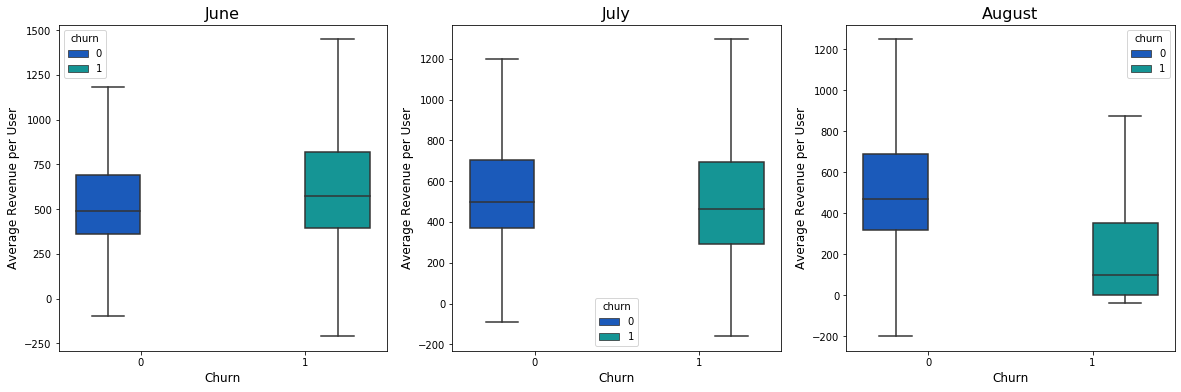

In [27]:
# Plot for Average revenue per user for each month
plot_box("arpu", "Average Revenue per User")

> <span style='color:darkcyan'> Average revenue per user dropped in August month for the users who left the operator. </span>

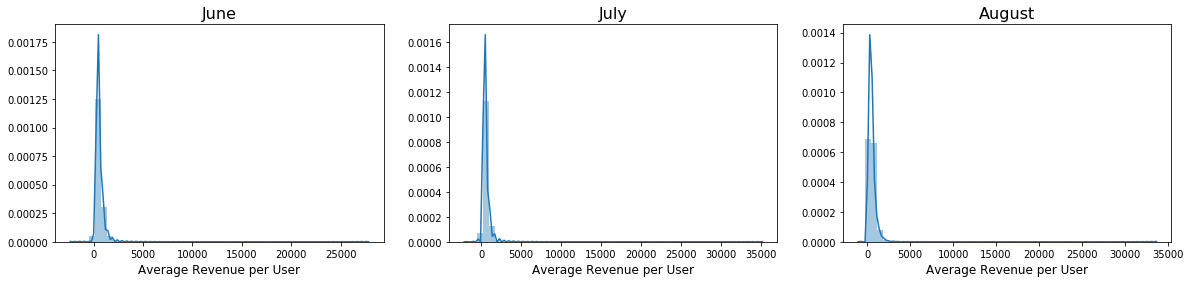

In [28]:
#Distribution Plot
plot_dist("arpu", "Average Revenue per User")

#### 2. Plot for Call minutes within the same network

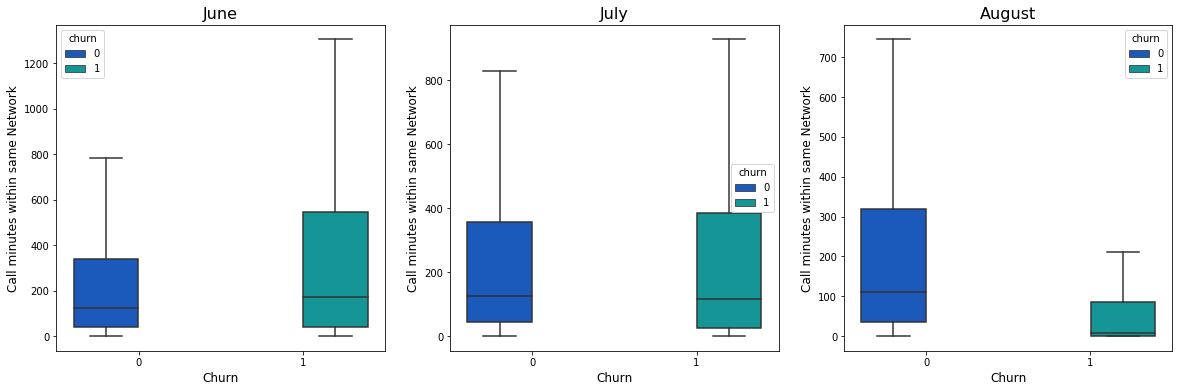

In [29]:
plot_box("onnet_mou", "Call minutes within same Network")

<span style='color:darkcyan'> The median number of minutes for voice calls on the same network dropped tremendously in August month for the users who left the operator. </span>

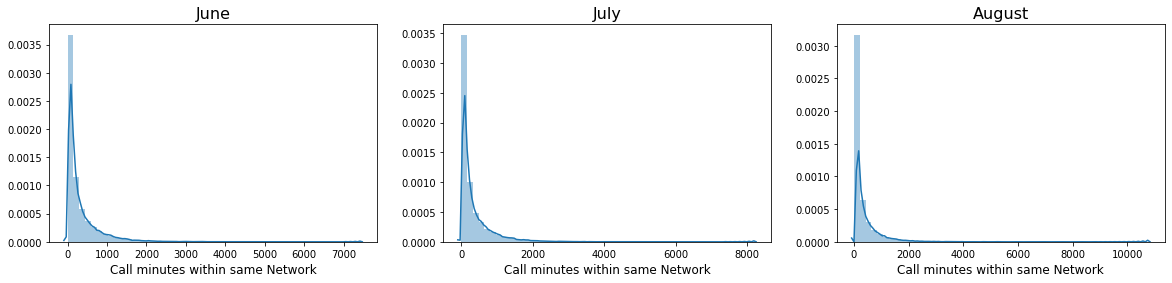

In [30]:
plot_dist("onnet_mou", "Call minutes within same Network")

#### 3. Plot for Call minutes outside own network

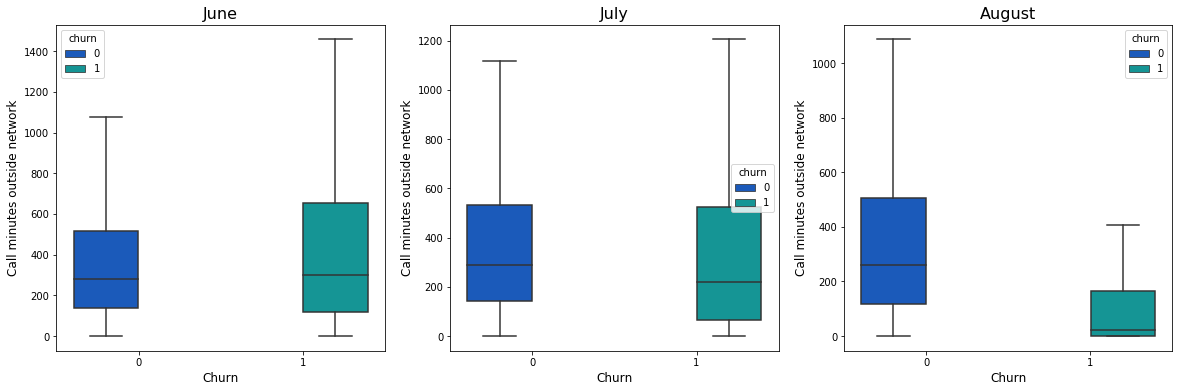

In [31]:
plot_box("offnet_mou", "Call minutes outside network")

<span style='color:darkcyan'> The median number of minutes for voice calls on other network dropped tremendously in August month for the users who left the operator. </span>

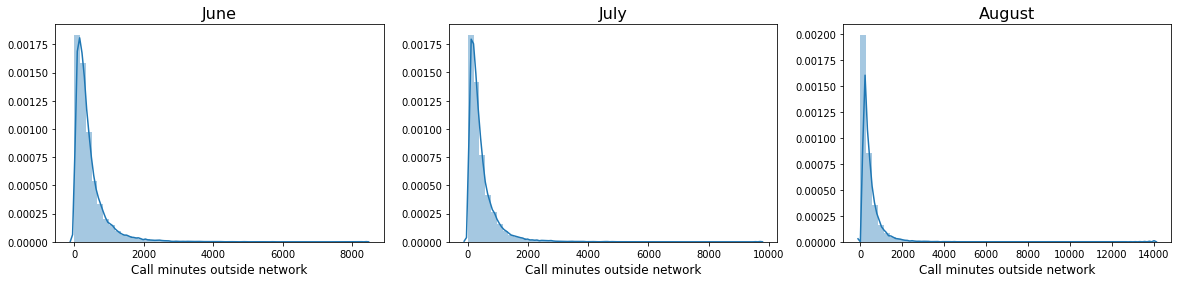

In [32]:
plot_dist("offnet_mou", "Call minutes outside network")

#### 4. Plot for Total outgoing minutes per user

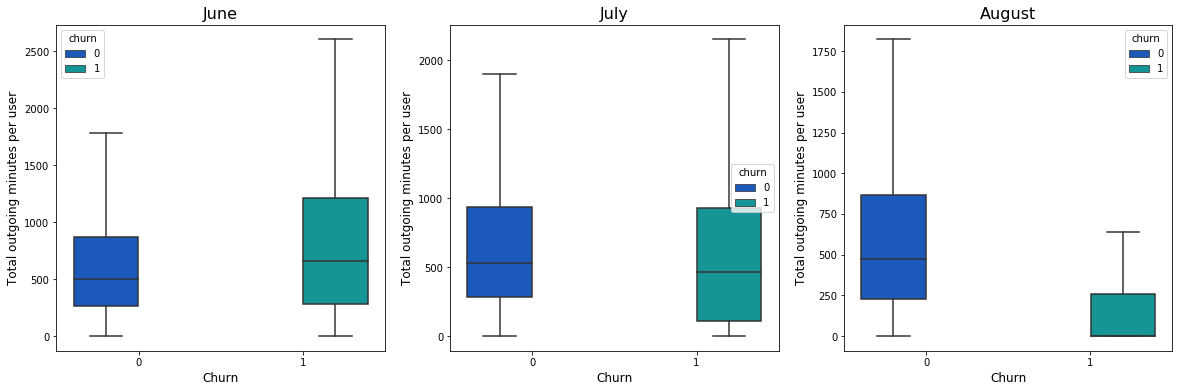

In [33]:
plot_box("total_og_mou", "Total outgoing minutes per user")

<span style='color:darkcyan'> The median number of minutes for outgoing voice calls dropped tremendously in August month for the users who left the operator. </span>

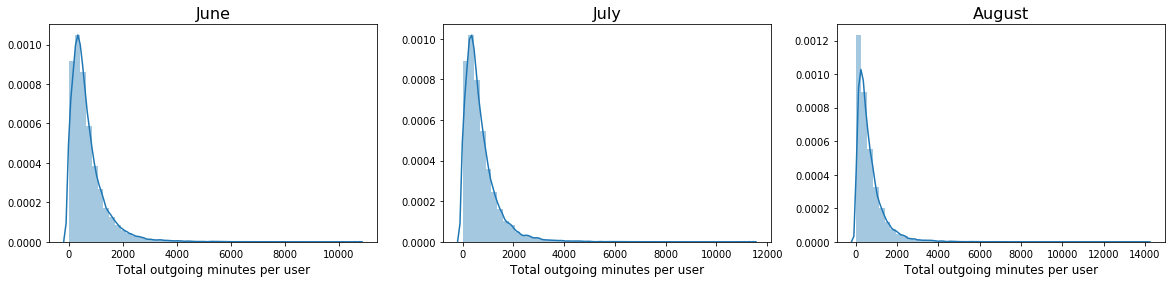

In [34]:
plot_dist("total_og_mou", "Total outgoing minutes per user")

#### 5. Plot for Total incoming minutes per user

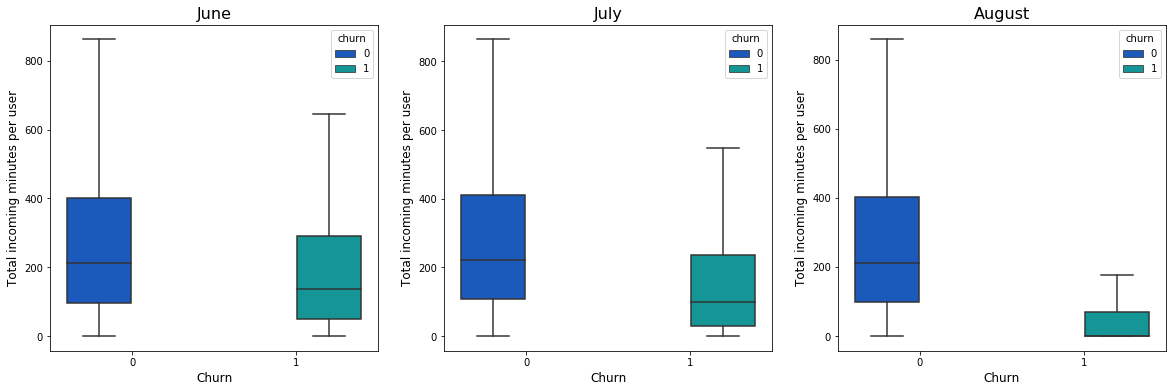

In [35]:
plot_box("total_ic_mou", "Total incoming minutes per user")

<span style='color:darkcyan'> The median number of minutes for incoming voice calls dropped tremendously in August month for the users who left the operator. </span>

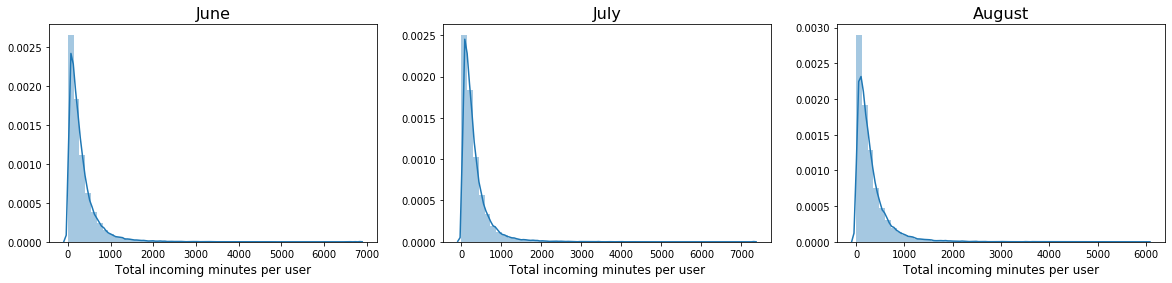

In [36]:
plot_dist("total_ic_mou", "Total incoming minutes per user")

#### 6. Plot for number  of recharges

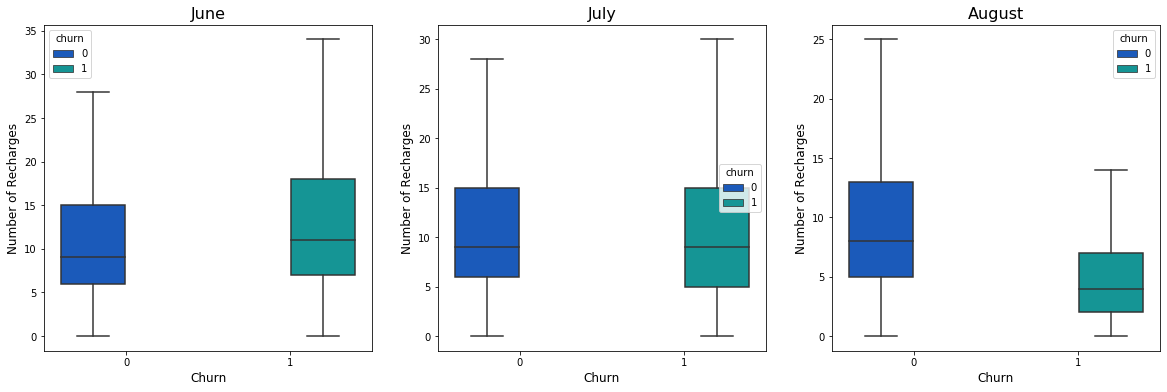

In [37]:
plot_box("total_rech_num", "Number of Recharges")

<span style='color:darkcyan'> The median number of recharges dropped tremendously in August month for the users who left the operator. </span>

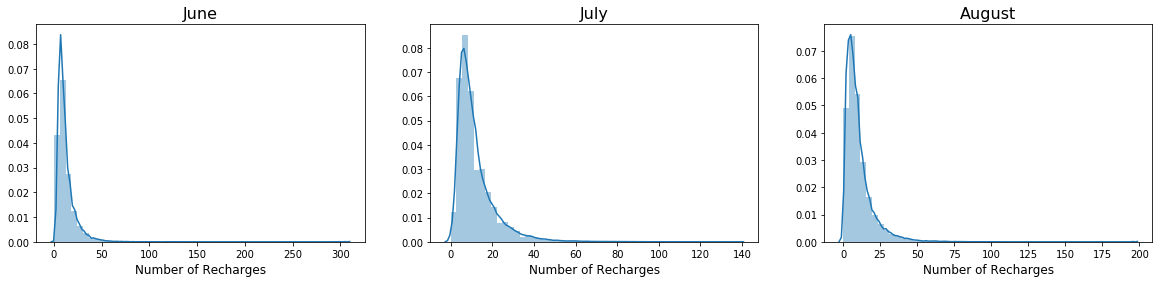

In [38]:
plot_dist("total_rech_num", "Number of Recharges")

#### 7. Plot for total recharge amount

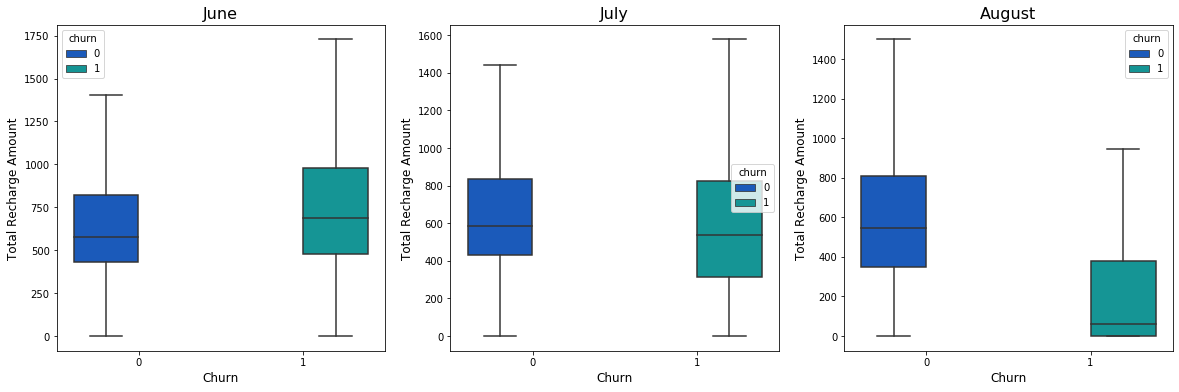

In [39]:
plot_box("total_rech_amt", "Total Recharge Amount")

<span style='color:darkcyan'> The total recharge amount dropped tremendously in August month for the users who left the operator. </span>

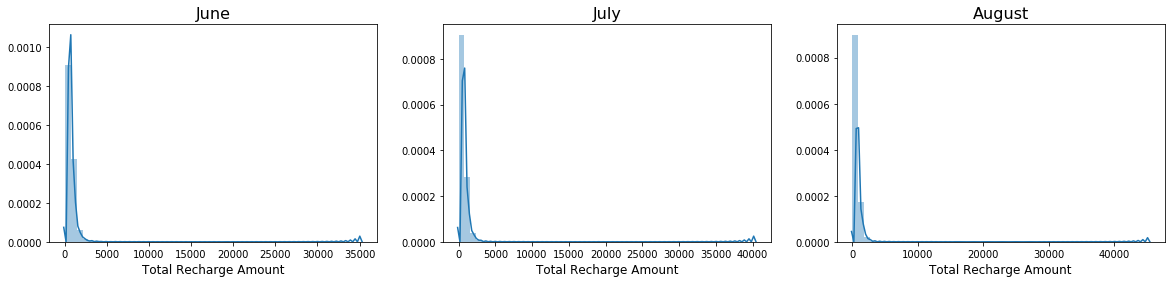

In [40]:
plot_dist("total_rech_amt", "Total Recharge Amount")

#### 8. Plot for Dates of last recharge by the user

In [41]:
#Method to create count plots
def plot_count(attribute, y_label, scale = "linear", yticks = None):
    plt.figure(figsize = (20,8))
    #Plot 1
    plt.subplot(1,3,1)
    sn.countplot(data = churn_df, y = attribute+"_6", hue = "churn",palette=("plasma"))
    plt.xlabel("Count", fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.title("June", fontsize  =16)
    plt.xscale(scale)
    if yticks != None:
        plt.yticks(yticks, labels = yticks)
    
    #Plot 2
    plt.subplot(1,3,2)
    sn.countplot(data = churn_df, y = attribute+"_7", hue = "churn",palette=("plasma"))
    plt.xlabel("Count", fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.title("July", fontsize  =16)
    plt.xscale(scale)
    if yticks != None:
        plt.yticks(yticks, labels = yticks)
    
    #Plot 3
    plt.subplot(1,3,3)
    sn.countplot(data = churn_df, y = attribute+"_8", hue = "churn",palette=("plasma"))
    plt.xlabel("Count", fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.title("August", fontsize  =16)
    plt.xscale(scale)
    if yticks != None:
        plt.yticks(yticks, labels = yticks)
    plt.show()


#### 9. Plot for Total data recharges in a month by a user

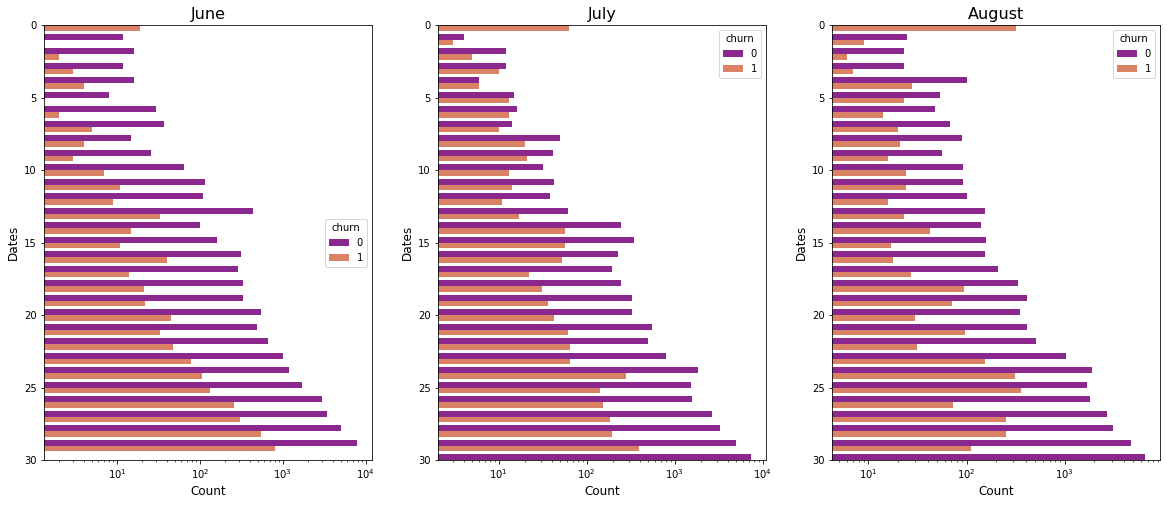

In [42]:
plot_count("date_of_last_rech", "Dates", "log", range(0,32,5))

#### 11. Distribution plots for Average revenue per month per user

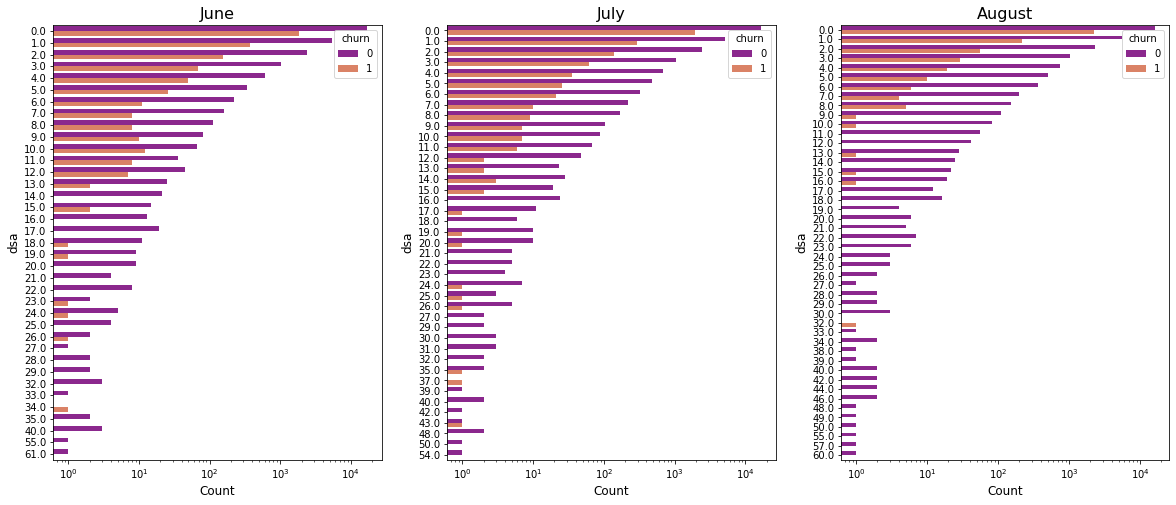

In [43]:
plot_count("total_rech_data", "dsa", "log")

<span style='color:darkcyan'> The number of data recharges dropped tremendously in August month for the users who left the operator. </span>

#### 10. Plots for Age on network

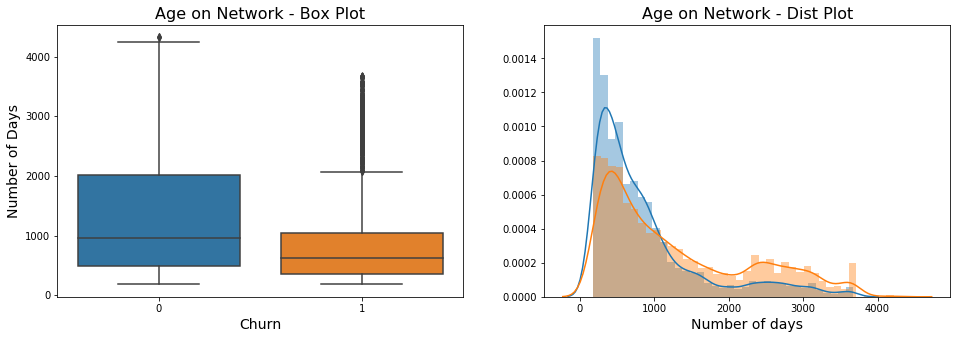

In [44]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sn.boxplot(data = churn_df, y = "aon", x = "churn")
plt.title("Age on Network - Box Plot", fontsize = 16)
plt.xlabel("Churn", fontsize = 14)
plt.ylabel("Number of Days", fontsize  = 14)
plt.subplot(1,2,2)
sn.distplot(churn_df[churn_df["churn"] == 1]["aon"])
sn.distplot(churn_df[churn_df["churn"] == 0]["aon"])
plt.title("Age on Network - Dist Plot", fontsize = 16)
plt.xlabel("Number of days", fontsize = 14)
plt.show()

<span style='color:darkcyan'> The users who switched networks spent relatively less time on the network as compared to the ones who did not leave the network. </span>

><span style = "color:darkcyan">There was significant dip in the figures during **action phase** in comparison to the good phase. From the above distribution plots it is also evident that the data is heavily skewed.</span>

### Feature Engineering

#### 1. Deriving New Features
New features are nothing but the average values of each feature for months 6 and 7 as they have equal importance. This will help us in get a stable set of features in the final model when we want to select features for interpretation and recommendation.

In [45]:
#Creating new features with average values for month 6 and 7
col_list = churn_df.filter(regex='_6|_7').columns.str[:-2]
for index, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av6&7"
    col_6 = col+"_6"
    col_7 = col+"_7"
    churn_df[avg_col_name] = (churn_df[col_6]  + churn_df[col_7])/ 2

In [46]:
#Dropping features for month 6 and 7    
churn_df.drop(columns = churn_df.filter(regex='_6|_7').columns, inplace = True)

#We do not want to keep the avg date column as it is not useful
churn_df.drop(columns = ["avg_date_of_last_rech_av6&7"], inplace = True)

In [47]:
churn_df.shape

(30011, 92)

#### 2. Handling Class Imbalance

> Since the dataset is highly imbalanced we applied undersampling technique to reduce the number of observations of the majority class. After trying a bunch of techniques such as oversampling using SMOTE we came to the conclusion of using undersampling due to the precision in accuracy. 

In [48]:
#Splitting the data into x and y data frames
y = churn_df.pop("churn")
X = churn_df

In [49]:
#Importing Random UnderSampler method to perform undersampling
from imblearn.under_sampling import RandomUnderSampler

In [50]:
print("Class weightage in the data set before undersampling.")
y.value_counts()

Class weightage in the data set before undersampling.


0    27418
1     2593
Name: churn, dtype: int64

In [51]:
#Undersampling the data set to form a balanced dataset
new_x,new_y  = RandomUnderSampler(sampling_strategy=1).fit_resample(X,y)

In [52]:
print("Class weightage in the data set after undersampling.")
new_y.value_counts()

Class weightage in the data set after undersampling.


1    2593
0    2593
Name: churn, dtype: int64

#### 3. Setting the mobile numbers as index of the dataset

In [53]:
#Setting mobile number as the index
new_x.set_index("mobile_number", inplace = True)

new_y = pd.Series(new_y.values, new_x.index)

#### 4. Applying Quantile Transformation

> Since the majority of the features are highly skewed and contain negative values we cannot apply simple scaling techniques such as **StandardScaler, MinMaxScaler, Log Scaling**.<br> 
We need a technique which handles outliers really well and is able to give us a distribution which is close to gaussian as it is known many machine learning algorithms tend to perform better on Gaussian Distributions. This is why we have used **Quantile Transformer**, a non linear transformation. It spreads out the most frequent data points, handles outliers really well and gives us an approximate normal distribution. It also helped build robust and high precision models.

In [54]:
#Import sklearn libraries for preprocessing
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

In [55]:
#Splitting the datasets into train and test
X_train, X_test, y_train, y_test = train_test_split(new_x,new_y, test_size = 0.3, random_state = 42)

In [56]:
#Applying Quantile transform to normalize the data
quantile_tranform = QuantileTransformer(output_distribution="normal")
X_train.iloc[:,:] = quantile_tranform.fit_transform(X_train)

#### 5. Dimensionality Reduction using Principal Component Analysis

In [57]:
#Importing libraries for Principal Component Analysis
from sklearn.decomposition import PCA

In [58]:
#Reducing the number of dimensions or features
dic = {}
for i in range(10,91,5):
    pca = PCA(n_components=i)
    pca.fit_transform(X_train)
    dic[i] = sum(pca.explained_variance_ratio_)

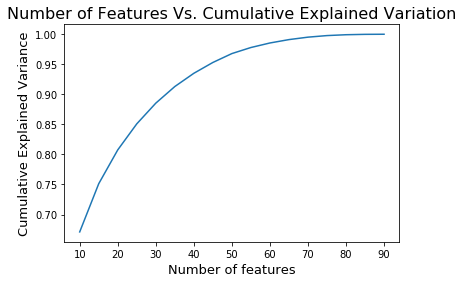

In [59]:
#Plotting a graph between the number of features and cumulative explained variance
num_features = list(dic.keys())
cum_exp_var = list(dic.values())

#Plot
plt.plot(num_features, cum_exp_var)
plt.title("Number of Features Vs. Cumulative Explained Variation", fontsize = 16)
plt.xlabel("Number of features", fontsize =13)
plt.ylabel("Cumulative Explained Variance", fontsize = 13)
plt.show()

In [60]:
#Reducing the variables to only 65
pca = PCA(0.95)
x_train_red = pca.fit_transform(X_train)

In [61]:
#Modified shape of the X_train matrix
print("The number of features explaining 95% of the variance in the data is {}".format(x_train_red.shape[1]))

The number of features explaining 95% of the variance in the data is 45


In [62]:
#Applying Quantile transform to normalize the test data
X_test.iloc[:,:] = quantile_tranform.transform(X_test)

In [63]:
#Shape of the PCA components
pca.components_.shape

(45, 90)

In [64]:
#Applying PCA transformation on X-test
x_test_reduced = pca.transform(X_test)

In [65]:
#Storing each models results in a data frame for comparison
results_df = pd.DataFrame( columns = ["Algorithm","ROC_train", "ROC_test", 
                                      "Recall_train", "Recall_test", 
                                      "Precision_train", "Precision_test", "Cut_off_prob"])

#Method to append each models results
def add_results(model,roc_train, roc_test, recall_train, recall_test, precision_train, precision_test, cut_off_prob):
        df = pd.DataFrame([[model, roc_train, roc_test, recall_train, recall_test, 
                            precision_train, precision_test, cut_off_prob]], 
                          columns = ["Algorithm","ROC_train", "ROC_test", 
                                      "Recall_train", "Recall_test", 
                                      "Precision_train", "Precision_test", "Cut_off_prob"])
        return results_df.append(df, ignore_index = True)
        

### Modelling using reduced features

#### Logistic Regression Model

In [66]:
#Importing all the necessary methods for builing the model and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support,recall_score, precision_score

In [67]:
#Training a Logistic Regression Model on the dataset
log_regression = LogisticRegression()
log_regression.fit(x_train_red, y_train)

LogisticRegression()

In [68]:
#Prediction on train dataset
y_train_pred_prob = log_regression.predict_proba(x_train_red)[:,1]

In [69]:
#Obtaining True Positive Rate and False Positive Rate
fpr, tpr, threshold = roc_curve(y_train, y_train_pred_prob)

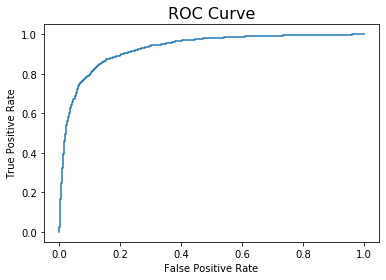

In [70]:
#ROC curve for the Logistic Regression model
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", fontsize = 16)
plt.show()

In [71]:
#The accuracy score
roc_train_score = roc_auc_score(y_train, y_train_pred_prob)
print("The ROC score for train dataset is {:2.2}".format(roc_train_score))

The ROC score for train dataset is 0.93


In [72]:
#Method to plot a precision recall curve
def plot_precision_recall_curve(y_true, y_pred ):
    precision, recall, threshold = precision_recall_curve(y_true, y_pred)
    precision = list(precision)
    precision.pop()
    recall = list(recall)
    recall.pop()
    plt.plot( threshold, recall, label = "Recall")
    plt.plot(threshold ,precision, label = "precision")
    plt.legend()
    plt.xlabel("Cut-off Probability", fontsize = 12)
    plt.title("Precision Recall Curve", fontsize = 15)
    plt.ylabel("Probability", fontsize = 12)
    plt.show()

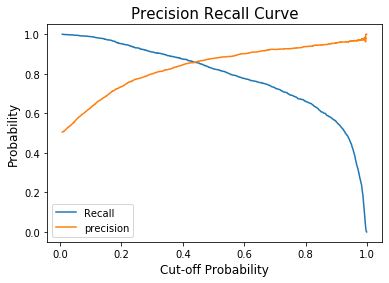

In [73]:
#Precision Recall Plot for training set
plot_precision_recall_curve(y_train, y_train_pred_prob)

In [74]:
#Assigning class labels based on cut off probability
y_train_pred = [0 if i <=0.1 else 1 for i in y_train_pred_prob]

>The choice of cut-off probability is based on our business requirement to identify the churners more accurately than identifying non-churners because the cost of acquiring a new customer is 5-10X more than retaining an existing one. That is why we will try to select the cut-off probability that will **maximize the Recall Score or True Positive Rate**.

$Recall Score = \frac{True Positives}{True Positives + False Negatives}$

In [75]:
#recall and precision values for training set
recall_train = recall_score(y_train,y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
print("The recall score is {:.2}".format(recall_train))
print("The precision score is {:.2}".format(precision_train))

The recall score is 0.99
The precision score is 0.63


In [76]:
#Method to create a confusion matrix
def create_conf_matrix(y_true, y_pred):
    conf_matrix = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                           columns=["Not Churn", "Churn"], index =["Not Churn", "Churn"])
    return conf_matrix

In [77]:
#Confusion Matrix for train data set
create_conf_matrix(y_train, y_train_pred)

,Not Churn,Churn
Not Churn,741,1062
Churn,22,1805


In [78]:
#Predicting the propability for test dataset
y_test_pred_prob = log_regression.predict_proba(x_test_reduced)

In [79]:
#computing the Accuracy for test dataset
roc_test_score = roc_auc_score(y_test, y_test_pred_prob[:,1])
print("The ROC score on test set is {:2.2}".format(roc_test_score))

The ROC score on test set is 0.93


In [80]:
#Recall score at 0.05 as cut-off probability
y_test_pred = [ 0 if i <= 0.1 else 1 for i in y_test_pred_prob[:,1]]
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test,y_test_pred)
print("The Recall score is {:.2}".format(recall_test))
print("The Precision score is {:.2}".format(precision_test))

The Recall score is 0.99
The Precision score is 0.62


In [81]:
#Confusion Matrix for test dataset
create_conf_matrix(y_test, y_test_pred)

,Not Churn,Churn
Not Churn,329,461
Churn,8,758


In [82]:
#Updating the global records table for Logistic Regression
results_df = add_results("Logistic Regression", roc_train_score, roc_test_score, 
                         recall_train, recall_test, precision_train, precision_test, 0.1)
results_df

,Algorithm,ROC_train,ROC_test,Recall_train,Recall_test,Precision_train,Precision_test,Cut_off_prob
0,Logistic Regression,0.93,0.93,0.99,0.99,0.63,0.62,0.10


><span style = "color : darkcyan"> **Logistic Regression has been able to fit the data really well. This is evident from the high ROC, Recall and precision score. Let's see if we can improve the preicision score of the classification keeping the recall value same.**</span> 

#### Bagging Classifier Model

In [83]:
#Importng Necessary methods for bagging and cross validation
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [84]:
#Creating a model using the above set of parameters
bagging = BaggingClassifier(random_state=42)

In [85]:
#Fitting the model onto the training dataset
bagging.fit(x_train_red, y_train)

BaggingClassifier(random_state=42)

In [86]:
#Predicting the probabilities for the training set
y_train_pred_prob = bagging.predict_proba(x_train_red)[:,1]

In [87]:
#The ROC score
roc_train_score = roc_auc_score(y_train, y_train_pred_prob)
print("The ROC score for train dataset is {:2.2}".format(roc_train_score))

The ROC score for train dataset is 1.0


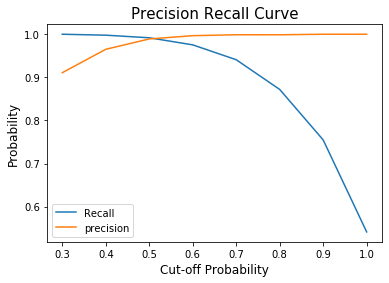

In [88]:
#Plotting the precision recall curve for the training data set
plot_precision_recall_curve(y_train, y_train_pred_prob)

In [89]:
#Assigning class labels based on cut off probability
y_train_pred = [0 if i <=0.5 else 1 for i in y_train_pred_prob]

In [90]:
#recall and precision values for training set
recall_train = recall_score(y_train,y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
print("The recall score is {:.2}".format(recall_train))
print("The precision score is {:.2}".format(precision_train))

The recall score is 0.98
The precision score is 1.0


In [91]:
#Confusion Matrix for train data set
create_conf_matrix(y_train, y_train_pred)

,Not Churn,Churn
Not Churn,1797,6
Churn,45,1782


In [92]:
#Predicting the propability for test dataset
y_test_pred_prob = bagging.predict_proba(x_test_reduced)

In [93]:
#computing the Accuracy for test dataset
roc_test_score = roc_auc_score(y_test, y_test_pred_prob[:,1])
print("The ROC score on test set is {:2.2}".format(roc_test_score))

The ROC score on test set is 0.9


In [94]:
#Recall score at 0.5 as cut-off probability
y_test_pred = [ 0 if i <= 0.5 else 1 for i in y_test_pred_prob[:,1]]
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test,y_test_pred)
print("The Recall score is {:.2}".format(recall_test))
print("The Precision score is {:.2}".format(precision_test))

The Recall score is 0.78
The Precision score is 0.87


In [95]:
#Confusion Matrix for test dataset
create_conf_matrix(y_test, y_test_pred)

,Not Churn,Churn
Not Churn,701,89
Churn,166,600


In [96]:
#Updating the global records table for Logistic Regression
results_df = add_results("Bagging", roc_train_score, roc_test_score, 
                         recall_train, recall_test, precision_train, precision_test, 0.5)
results_df

,Algorithm,ROC_train,ROC_test,Recall_train,Recall_test,Precision_train,Precision_test,Cut_off_prob
0,Logistic Regression,0.93,0.93,0.99,0.99,0.63,0.62,0.10
1,Bagging,1.00,0.90,0.98,0.78,1.00,0.87,0.50


><span style = "color : darkcyan"> **Bagging technique overfits the data on default parameters. Hence we will try tuning it using GridSearchCV in the next model.** </span>

#### Bagging Classifier Model 
Using Cross Validation to prevent overfitting

In [241]:
#Grid Search CV
params = {"n_estimators" : range(100,150,10),
    "max_samples" : [50,100,200,250,300],
    "max_features" : range(20,50,10)
}

#Creating GridSearch Instance
gridsearch = GridSearchCV(param_grid=params, estimator = BaggingClassifier(), scoring  = 'roc_auc')

In [242]:
#Fitting the Grid Search CV
gridsearch.fit(x_train_red, y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'max_features': range(20, 50, 10),
                         'max_samples': [50, 100, 200, 250, 300],
                         'n_estimators': range(100, 150, 10)},
             scoring='roc_auc')

In [243]:
#Best Parameters for grid search
gridsearch.best_params_

{'max_features': 30, 'max_samples': 300, 'n_estimators': 130}

In [97]:
#Creating a model using the above set of parameters
bagging = BaggingClassifier(n_estimators = 130, max_samples=300, max_features=30, random_state=42)

In [98]:
#Fitting the model onto the training dataset
bagging.fit(x_train_red, y_train)

BaggingClassifier(max_features=30, max_samples=300, n_estimators=130,
                  random_state=42)

In [99]:
#Predicting the probabilities for the training set
y_train_pred_prob = bagging.predict_proba(x_train_red)[:,1]

In [100]:
#The accuracy score
roc_train_score = roc_auc_score(y_train, y_train_pred_prob)
print("The ROC score for train dataset is {:2.2}".format(roc_train_score))

The ROC score for train dataset is 0.95


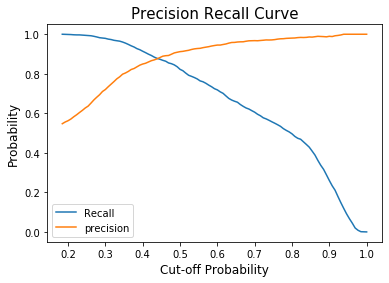

In [101]:
#Plotting the precision recall curve for the training data set
plot_precision_recall_curve(y_train, y_train_pred_prob)

In [102]:
#Assigning class labels based on cut off probability
y_train_pred = [0 if i <=0.3 else 1 for i in y_train_pred_prob]

In [103]:
#recall and precision values for training set
recall_train = recall_score(y_train,y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
print("The recall score is {:.2}".format(recall_train))
print("The precision score is {:.2}".format(precision_train))

The recall score is 0.98
The precision score is 0.73


In [104]:
#Confusion Matrix for train data set
create_conf_matrix(y_train, y_train_pred)

,Not Churn,Churn
Not Churn,1159,644
Churn,45,1782


In [105]:
#Predicting the propability for test dataset
y_test_pred_prob = bagging.predict_proba(x_test_reduced)

In [106]:
#computing the Accuracy for test dataset
roc_test_score = roc_auc_score(y_test, y_test_pred_prob[:,1])
print("The ROC score is {:2.2}".format(roc_test_score))

The ROC score is 0.92


In [107]:
#Recall score at 0.3 as cut-off probability
y_test_pred = [ 0 if i <= 0.3 else 1 for i in y_test_pred_prob[:,1]]
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test,y_test_pred)
print("The Recall score is {:.2}".format(recall_test))
print("The Precision score is {:.2}".format(precision_test))

The Recall score is 0.96
The Precision score is 0.68


In [108]:
#Confusion Matrix for test dataset
create_conf_matrix(y_test, y_test_pred)

,Not Churn,Churn
Not Churn,446,344
Churn,27,739


In [109]:
#Updating the global records table for Logistic Regression
results_df = add_results("Bagging 2.0", roc_train_score, roc_test_score, 
                         recall_train, recall_test, precision_train, precision_test, 0.45)
results_df

,Algorithm,ROC_train,ROC_test,Recall_train,Recall_test,Precision_train,Precision_test,Cut_off_prob
0,Logistic Regression,0.93,0.93,0.99,0.99,0.63,0.62,0.10
1,Bagging,1.00,0.90,0.98,0.78,1.00,0.87,0.50
2,Bagging 2.0,0.95,0.92,0.98,0.96,0.73,0.68,0.45


><span style = "color  : darkcyan"> **The results obtained after using cross validation are at par with the Logistic Regression Model build earlier. We now use Boosting to see if we can further improve the scores.** </span>

#### AdaBoost Classifier Model
On default parameters

In [110]:
#Importing the adaboost classifier from sklearn
from sklearn.ensemble import AdaBoostClassifier

In [111]:
#Creating an adaboost instance and fitting the model on the training dataset
adaboost = AdaBoostClassifier().fit(x_train_red, y_train)

In [112]:
#Predicting the probabilities for the training set
y_train_pred_prob = adaboost.predict_proba(x_train_red)[:,1]

In [113]:
#The accuracy score
roc_train_score = roc_auc_score(y_train, y_train_pred_prob)
print("The ROC score for train dataset is {:2.2}".format(roc_train_score))

The ROC score for train dataset is 0.94


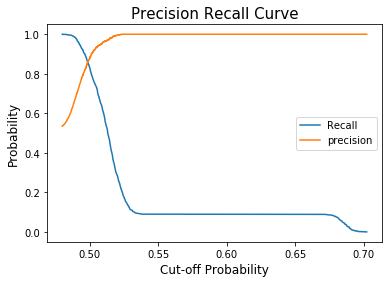

In [114]:
#Plotting the precision recall curve for the training data set
plot_precision_recall_curve(y_train, y_train_pred_prob)

In [115]:
#Assigning class labels based on cut off probability
y_train_pred = [0 if i <=0.49 else 1 for i in y_train_pred_prob]

In [116]:
#recall and precision values for training set
recall_train = recall_score(y_train,y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
print("The recall score is {:.2}".format(recall_train))
print("The precision score is {:.2}".format(precision_train))

The recall score is 0.98
The precision score is 0.69


In [117]:
#Confusion Matrix for train data set
create_conf_matrix(y_train, y_train_pred)

,Not Churn,Churn
Not Churn,984,819
Churn,40,1787


In [118]:
#Predicting the propability for test dataset
y_test_pred_prob = adaboost.predict_proba(x_test_reduced)

In [119]:
#computing the Accuracy for test dataset
roc_test_score = roc_auc_score(y_test, y_test_pred_prob[:,1])
print("The ROC score is {:2.2}".format(roc_test_score))

The ROC score is 0.92


In [120]:
#Recall score at 0.49 as cut-off probability
y_test_pred = [ 0 if i <= 0.49 else 1 for i in y_test_pred_prob[:,1]]
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test,y_test_pred)
print("The Recall score is {:.2}".format(recall_test))
print("The Precision score is {:.2}".format(precision_test))

The Recall score is 0.97
The Precision score is 0.65


In [121]:
#Confusion Matrix for test dataset
create_conf_matrix(y_test, y_test_pred)

,Not Churn,Churn
Not Churn,387,403
Churn,23,743


In [122]:
#Updating the global records table for Logistic Regression
results_df = add_results("AdaBoost", roc_train_score, roc_test_score, 
                         recall_train, recall_test, precision_train, precision_test, 0.49)
results_df

,Algorithm,ROC_train,ROC_test,Recall_train,Recall_test,Precision_train,Precision_test,Cut_off_prob
0,Logistic Regression,0.93,0.93,0.99,0.99,0.63,0.62,0.10
1,Bagging,1.00,0.90,0.98,0.78,1.00,0.87,0.50
2,Bagging 2.0,0.95,0.92,0.98,0.96,0.73,0.68,0.45
3,AdaBoost,0.94,0.92,0.98,0.97,0.69,0.65,0.49


><span style="color:darkcyan"> **The AdaBoost Model is also providing similar results and is not a significant improvement on the earlier models.** </span>

#### Random Forest Classifier model

In [123]:
#Importing Random Forest method from sklearn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Random Forest Classifier Using GridserachCV
randomforest = RandomForestClassifier()
params = {
    "max_depth" :[5,10,15,20,30,40, 50],
    "min_samples_split" : [50,100,200],
    "min_samples_leaf" : [50,100,200]
}

#Creating the cross validation instance
gridcv = GridSearchCV(estimator= RandomForestClassifier(), 
                     param_grid= params,
                     scoring = "roc_auc").fit(x_train_red, y_train)

In [ ]:
#Best Parameters
gridcv.best_params_

In [124]:
#Fitting a random forest model using the parameters provided by gridsearch cross validation
randomforest = RandomForestClassifier(max_depth = 20, 
                                      min_samples_leaf = 50, 
                                      min_samples_split = 50).fit(x_train_red, y_train)

In [125]:
#Predicting the probabilities for the training set
y_train_pred_prob = randomforest.predict_proba(x_train_red)[:,1]

In [126]:
#The accuracy score
roc_train_score = roc_auc_score(y_train, y_train_pred_prob)
print("The ROC score for train dataset is {:2.2}".format(roc_train_score))

The ROC score for train dataset is 0.94


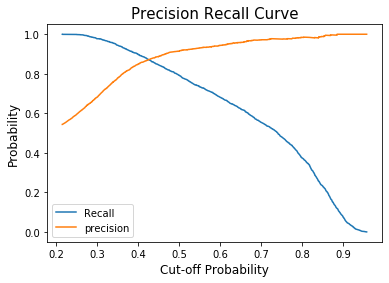

In [127]:
#Plotting the precision recall curve for the training data set
plot_precision_recall_curve(y_train, y_train_pred_prob)

In [128]:
#Assigning class labels based on cut off probability
y_train_pred = [0 if i <=0.3 else 1 for i in y_train_pred_prob]

In [129]:
#recall and precision values for training set
recall_train = recall_score(y_train,y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
print("The recall score is {:.2}".format(recall_train))
print("The precision score is {:.2}".format(precision_train))

The recall score is 0.98
The precision score is 0.68


In [130]:
#Confusion Matrix for train data set
create_conf_matrix(y_train, y_train_pred)

,Not Churn,Churn
Not Churn,970,833
Churn,41,1786


In [131]:
#Predicting the propability for test dataset
y_test_pred_prob = randomforest.predict_proba(x_test_reduced)

In [132]:
#computing the Accuracy for test dataset
roc_test_score = roc_auc_score(y_test, y_test_pred_prob[:,1])
print("The accuracy score is {:2.2}".format(roc_test_score))

The accuracy score is 0.92


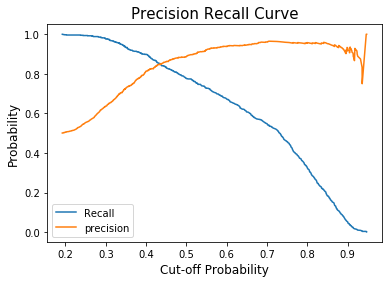

In [133]:
plot_precision_recall_curve(y_test, y_test_pred_prob[:,1])

In [134]:
#Recall score at 0.05 as cut-off probability
y_test_pred = [ 0 if i <= 0.3 else 1 for i in y_test_pred_prob[:,1]]
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test,y_test_pred)
print("The Recall score is {:.2}".format(recall_test))
print("The Precision score is {:.2}".format(precision_test))

The Recall score is 0.98
The Precision score is 0.64


In [135]:
#Confusion Matrix for test dataset
create_conf_matrix(y_test, y_test_pred)

,Not Churn,Churn
Not Churn,363,427
Churn,18,748


In [136]:
#Updating the global records table for Logistic Regression
results_df = add_results("Random Forest", roc_train_score, roc_test_score, 
                         recall_train, recall_test, precision_train, precision_test, 0.3)
results_df

,Algorithm,ROC_train,ROC_test,Recall_train,Recall_test,Precision_train,Precision_test,Cut_off_prob
0,Logistic Regression,0.93,0.93,0.99,0.99,0.63,0.62,0.10
1,Bagging,1.00,0.90,0.98,0.78,1.00,0.87,0.50
2,Bagging 2.0,0.95,0.92,0.98,0.96,0.73,0.68,0.45
3,AdaBoost,0.94,0.92,0.98,0.97,0.69,0.65,0.49
4,Random Forest,0.94,0.92,0.98,0.98,0.68,0.64,0.30


><span style = "color:darkcyan">**The Random Forest Classifier is also no improvement on the previous models. Next we will try fitting a Support Vector Classfier.**</span>

#### Support Vector Classifier Model

In [137]:
#Importing the SVC method
from sklearn.svm import SVC

In [138]:
#Fitting SVC on default parameters
svc = SVC( kernel = "rbf",probability = True).fit(x_train_red, y_train)

In [139]:
#Predicting the probabilities for the training set
y_train_pred_prob = svc.predict_proba(x_train_red)[:,1]

In [140]:
#The accuracy score
roc_train_score = roc_auc_score(y_train, y_train_pred_prob)
print("The ROC score for train dataset is {:2.2}".format(roc_train_score))

The ROC score for train dataset is 0.96


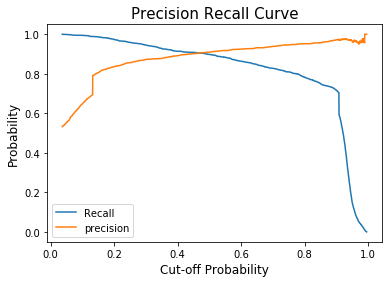

In [141]:
#Plotting the precision recall curve for the training data set
plot_precision_recall_curve(y_train, y_train_pred_prob)

In [142]:
#Assigning class labels based on cut off probability
y_train_pred = [0 if i <=0.1 else 1 for i in y_train_pred_prob]

In [143]:
#recall and precision values for training set
recall_train = recall_score(y_train,y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
print("The recall score is {:.2}".format(recall_train))
print("The precision score is {:.2}".format(precision_train))

The recall score is 0.99
The precision score is 0.65


In [144]:
#Confusion Matrix for train data set
create_conf_matrix(y_train, y_train_pred)

,Not Churn,Churn
Not Churn,820,983
Churn,10,1817


In [145]:
#Predicting the propability for test dataset
y_test_pred_prob = svc.predict_proba(x_test_reduced)

In [146]:
#computing the Accuracy for test dataset
roc_test_score = roc_auc_score(y_test, y_test_pred_prob[:,1])
print("The ROC score is {:2.2}".format(roc_test_score))

The ROC score is 0.94


In [147]:
#Recall score at 0.1 as cut-off probability
y_test_pred = [ 0 if i <= 0.1 else 1 for i in y_test_pred_prob[:,1]]
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test,y_test_pred)
print("The Recall score is {:.2}".format(recall_test))
print("The Precision score is {:.2}".format(precision_test))

The Recall score is 0.99
The Precision score is 0.64


In [148]:
#Confusion Matrix for test dataset
create_conf_matrix(y_test, y_test_pred)

,Not Churn,Churn
Not Churn,354,436
Churn,5,761


In [149]:
#Updating the global records table for Logistic Regression
results_df = add_results("Support Vector Classifier", roc_train_score, roc_test_score, 
                         recall_train, recall_test, precision_train, precision_test, 0.1)
results_df

,Algorithm,ROC_train,ROC_test,Recall_train,Recall_test,Precision_train,Precision_test,Cut_off_prob
0,Logistic Regression,0.93,0.93,0.99,0.99,0.63,0.62,0.10
1,Bagging,1.00,0.90,0.98,0.78,1.00,0.87,0.50
2,Bagging 2.0,0.95,0.92,0.98,0.96,0.73,0.68,0.45
3,AdaBoost,0.94,0.92,0.98,0.97,0.69,0.65,0.49
4,Random Forest,0.94,0.92,0.98,0.98,0.68,0.64,0.30
5,Support Vector Classifier,0.96,0.94,0.99,0.99,0.65,0.64,0.10


><span style = "color:darkcyan"> **The Support Vecor Classifier is providing similar results to that of Logistic Regression with a slight improvement in the Precision score.**</span>

><span style =  "color:darkcyan"> **Since almost all the models are giving approximately same amount of scores for recall and precision we can use either of them to predict churn. But it would be preferable to use logistic regression to make predictions as it is a simple model whereas Boosting, Random Forests, SVC are more complex models and computationally more expensive.**</span>

### Modelling : Part 2
>**This model is being created to get the most relevent features for the purpose of making strategic recommendations and actions.**

#### Random Forest Model 

In [303]:
#Importing necessary libraries 
from sklearn.feature_selection import RFE

In [304]:
#Using RFE cross validation to get 10 most important features
cv = RFE(RandomForestClassifier(max_depth = 20, min_samples_leaf = 50, min_samples_split = 50), 
         n_features_to_select=10).fit(X_train, y_train)

In [305]:
#Storing the most influencial features in a variable
features = list(X_train.columns[cv.support_])

In [306]:
#Creating a new dataframe for the data with filtered features
train_X = X_train[features]

In [307]:
#Building the model using the paramters found using gridsearch
randomforest = RandomForestClassifier(max_depth =20, 
                                      min_samples_leaf = 50, 
                                      min_samples_split = 50).fit(train_X, y_train)

In [308]:
#Importance of the selected 10 features
randomforest.feature_importances_

array([0.08829284, 0.06555854, 0.08827342, 0.05243052, 0.0953399 ,
       0.17665286, 0.23862735, 0.04429064, 0.07319926, 0.07733467])

In [309]:
#Making predictions on the training dataset
y_train_pred_prob = randomforest.predict_proba(train_X)[:,1]

In [310]:
#The accuracy score
roc_train_score = roc_auc_score(y_train, y_train_pred_prob)
print("The ROC score for train dataset is {:2.2}".format(roc_train_score))

The ROC score for train dataset is 0.93


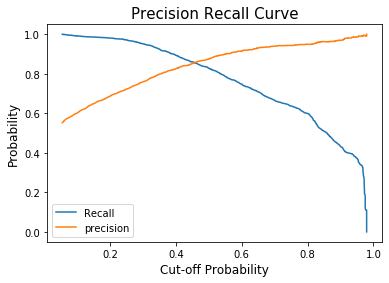

In [311]:
#Plotting the precision recall curve for the training data set
plot_precision_recall_curve(y_train, y_train_pred_prob)

In [312]:
#Assigning class labels based on cut off probability
y_train_pred = [0 if i <=0.3 else 1 for i in y_train_pred_prob]

In [313]:
#recall and precision values for training set
recall_train = recall_score(y_train,y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
print("The recall score is {:.2}".format(recall_train))
print("The precision score is {:.2}".format(precision_train))

The recall score is 0.95
The precision score is 0.76


In [314]:
#Confusion Matrix for train data set
create_conf_matrix(y_train, y_train_pred)

,Not Churn,Churn
Not Churn,1250,553
Churn,87,1740


In [315]:
#Predicting the propability for test dataset
test_X = X_test[features]
y_test_pred_prob = randomforest.predict_proba(test_X)[:,1]

In [316]:
#computing the Accuracy for test dataset
roc_test_score = roc_auc_score(y_test, y_test_pred_prob)
print("The ROC score is {:2.2}".format(roc_test_score))

The ROC score is 0.93


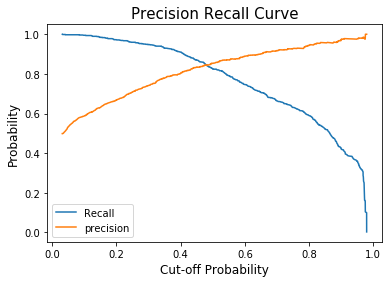

In [317]:
#Precision recall curve for the tes datset
plot_precision_recall_curve(y_test, y_test_pred_prob)

In [318]:
#Recall score at 0.3 as cut-off probability
y_test_pred = [ 0 if i <= 0.3 else 1 for i in y_test_pred_prob]
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test,y_test_pred)
print("The Recall score is {:.2}".format(recall_test))
print("The Precision score is {:.2}".format(precision_test))

The Recall score is 0.95
The Precision score is 0.74


In [319]:
#Confusion Matrix for test dataset
create_conf_matrix(y_test, y_test_pred)

,Not Churn,Churn
Not Churn,537,253
Churn,40,726


In [320]:
#Storing the importance of all the shortlisted features in a dataframe
df = pd.DataFrame()
df["features"] = train_X.columns
df["Coefficients"] = list(randomforest.feature_importances_.flatten())

#Sorting the features with respect to their coefficients
df.sort_values(by = "Coefficients", inplace = True)

#Resetting the index
df.reset_index(drop = True, inplace =  True)

In [321]:
#The list of the most imprtant features used to build the Random Forest Model
df

,features,Coefficients
0,total_rech_amt_8,0.04
1,loc_ic_t2t_mou_8,0.05
2,loc_og_t2m_mou_8,0.07
3,date_of_last_rech_8,0.07
4,last_day_rch_amt_8,0.08
5,loc_og_mou_8,0.09
6,roam_og_mou_8,0.09
7,loc_ic_t2m_mou_8,0.10
8,loc_ic_mou_8,0.18
9,total_ic_mou_8,0.24


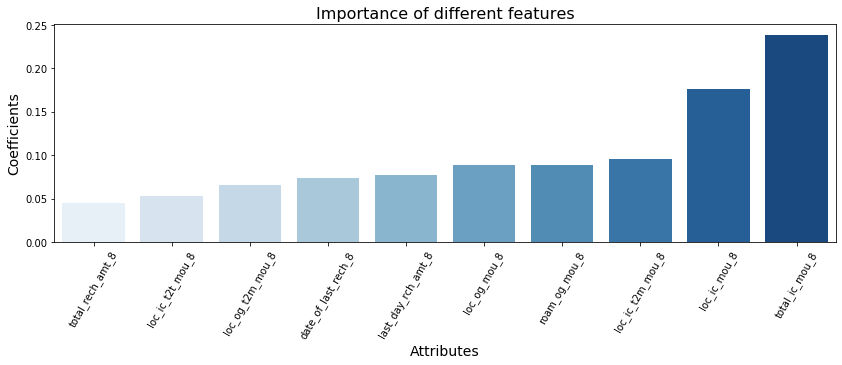

In [322]:
#Creating a bar plot to display the importance of features
plt.figure(figsize = (14,4))
sn.barplot(data = df, x = "features", y = "Coefficients", palette = "Blues")
plt.xticks(rotation = 60)
plt.title("Importance of different features", fontsize = 16)
plt.xlabel("Attributes", fontsize = 14)
plt.ylabel("Coefficients" , fontsize = 14)
plt.show()

It can be seen that the churn predictions are mostly dependent on the features or data for the action phase when the users usage decreased heavily which is kind of obvious.

### Strategy Recommendations to reduce Churn

- The company must try to start some **Customer Loyalty program** for users as it has been found that users who have been associated with the network for a longer duration are less likely to make a switch as they need a very compelling reason to move to other operators like heavy reduction in prices, increased network issues and so on.


- Based on customer's usage the company can provide **personalized plans** such as customers who travel alot can be offered benefits on roaming calls.


- It can be seen that the total incoming call minutes is a strong indicator that is customer is likely to churn. So that indicates that during the action phase the user is either already using the services of other telecom operator or is not using the services in general. The company can offer **compelling offers** to users in order to manipulate user network preferences.


- Also the company can **update its pricing plans** based on competitiors pricing and other value added services. 


- Provinding **discounts to some partnered OTT platforms** can reduce customers overall expenses which can make them stay on the network. For example Reliance Jio provides free access to all its apps.


- **Improving customer support** can help reduce churn as sometimes users switch to different networks due to unnecessary charges which were not reverted because of poor handling by customer support executives.